# ❤️ Heart-Disease-Prediction-Project

This project examines machine learning techniques to predict the likelihood of heart disease using patient data.
It covers the complete ML workflow — from data preprocessing and exploratory analysis to model training, evaluation, and comparison — using **multiple classification algorithms** in Python.

---

## 📊 Project Overview

Heart disease is one of the leading causes of death globally. Early prediction can help medical professionals take preventive action.
In this project, we build and evaluate classification models that predict whether a patient is likely to develop heart disease (**1**) or not (**0**) using health-related features.

---

## 🧠 Workflow

1. **Data Collection**
   - Load and inspect the dataset (`heart_disease_data.csv`).

2. **Data Preprocessing**
   - Handle missing values (if any)
   - Explore and visualize features
   - Encode categorical variables
   - Standardize or scale numerical features (if required)

3. **Train-Test Split**
   - Split the dataset into training and testing sets to evaluate generalization performance.

4. **Model Training**
   - Train multiple classification models, such as:
     - K-Nearest Neighbors (KNN)
     - Logistic Regression ✅
     - Support Vector Machine (SVM)
     - Random Forest
     - Gradient Boosting / XGBoost

5. **Model Evaluation**
   - Compare model performance using:
     - Accuracy
     - Precision, Recall, F1-score
     - Confusion Matrix
     - ROC-AUC Curve

6. **Prediction**
   - Test the trained models with new or sample patient data.

---

##### Importing Necessary Libraries

In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Collection**

In [26]:
# Get the directory where the script is located
BASE_DIR = os.getcwd()
file_path = os.path.join(BASE_DIR, "heart_disease_data.csv")

heart_df = pd.read_csv(file_path)
heart_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **Data Preprocessing**

In [27]:
#Checking For Missing Values
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
#Confirming Data Types And Null Values
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
#Statistical Measures
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target
1    165
0    138
Name: count, dtype: int64


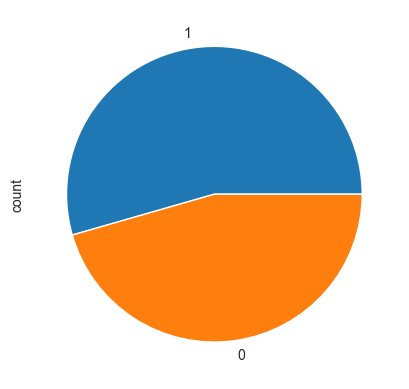

In [30]:
#Checking For The Target Distribution
print(heart_df['target'].value_counts())

heart_df['target'].value_counts().plot(kind='pie')
plt.show()

## **Data Splitting**

In [31]:
#Feature-Target Splitting
X, y = heart_df.iloc[:,:-1], heart_df.iloc[:,-1]

In [32]:
#Train-Test Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)

X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3


### Standardization
We standardize this dataset because its continuous features are on very different scales, which can cause models like Logistic Regression, SVM, KNN, and Neural Networks to give more weight to larger-valued features. Standardization rescales these features to have a mean of 0 and a standard deviation of 1, ensuring they contribute equally during training and improving model performance. While tree-based models don’t require it, standardizing keeps the workflow consistent across different algorithms.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Standardizing Training Data
X_train[feat] = scaler.fit_transform(X_train[feat])

#Standardizing Test Data
X_test[feat] = scaler.fit_transform(X_test[feat])


## **Modelling**

**Hyperparameter Tuning**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.01, 0.1, 1, 10]},
    {'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'saga'], 'C': [0.01, 0.1, 1, 10]}
]

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8470238095238095


**Modelling**

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print(y_pred_proba)

[0.09339669 0.12027157 0.11630523 0.03207542 0.91757483 0.8740652
 0.20064971 0.99364505 0.02413322 0.99100156 0.10847227 0.98300155
 0.55514019 0.73821713 0.74128044 0.68082893 0.0768483  0.98979222
 0.96926315 0.03831588 0.78403541 0.12928786 0.96535066 0.97783475
 0.89203749 0.67496372 0.97181094 0.9076248  0.89581043 0.86239856
 0.00578516 0.29957831 0.96062287 0.01790023 0.40793191 0.46534818
 0.91789953 0.61929619 0.01197504 0.01208057 0.6205626  0.9895132
 0.07866788 0.40813766 0.08991633 0.00750572 0.41254133 0.56895965
 0.96028573 0.7904162  0.06823916 0.89457011 0.9702736  0.94620736
 0.4068137  0.04630385 0.07150867 0.02091103 0.01007236 0.01600706
 0.74841821]


## **Model Evaluation**

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7868852459016393


ROC-AUC: 0.8620689655172413


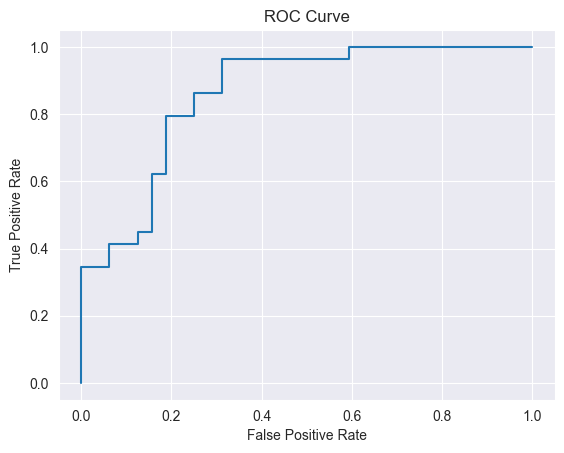

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


[[24  8]
 [ 5 24]]


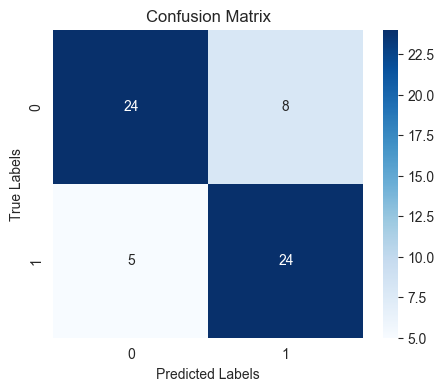

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()